In [2]:
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import os
from parameters import parameters as pm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import timeit
import joblib

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel('../sampling/samples_para_stress_gamma_0.5.xlsx')

In [6]:
df.columns

Index([   2.3093221594683877,     3.911463342917588,     1.651464352862656,
           5.370799773589519,     9.534096083547043,     6.533869871831274,
          2.7706704542977456,     8.780149126721955,    16.088312566855976,
          19.096436396853072,    3.6475369586344946,     3.069985072416962,
       '3.069985072416962.1',      6.65566078863159],
      dtype='object')

In [8]:
df.columns=['a','b','af','bf','as','bs','afs','bfs','sigma_fs_fs','sigma_sf_fs','sigma_fn_fn','sigma_nf_fn','sigma_ns_sn','sigma_sn_sn']

In [10]:
df.describe()

,a,b,af,bf,as,bs,afs,bfs,sigma_fs_fs,sigma_sf_fs,sigma_fn_fn,sigma_nf_fn,sigma_ns_sn,sigma_sn_sn
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,5.503265,5.501516,5.503804,5.500101,5.496076,5.498827,5.502831,5.496800,28.510323,28.511098,15.457270,13.497901,13.497901,15.458045
std,2.598729,2.600133,2.597712,2.600761,2.597625,2.600409,2.599244,2.598767,15.932400,15.863695,11.594689,11.513777,11.513777,11.538149
min,1.006414,1.004174,1.000365,1.008132,1.001111,1.005108,1.003081,1.000456,3.453247,2.873371,1.585119,0.680813,0.680813,1.486637
25%,3.256919,3.247223,3.260273,3.250935,3.252458,3.251541,3.262341,3.248012,16.202917,16.275803,7.148859,5.236329,5.236329,7.272444
50%,5.505608,5.504290,5.503793,5.508426,5.496537,5.492069,5.503747,5.495852,24.914697,24.752026,11.444133,9.631941,9.631941,11.430279
75%,7.750166,7.751052,7.752172,7.753737,7.738573,7.749632,7.749186,7.743569,37.742040,37.658352,20.466279,18.641145,18.641145,20.546081
max,9.995596,9.998702,9.994417,9.992480,9.992159,9.995359,9.999022,9.991591,109.718029,109.300933,59.708802,56.708372,56.708372,59.037443


In [12]:
df.head(5)

,a,b,af,bf,as,bs,afs,bfs,sigma_fs_fs,sigma_sf_fs,sigma_fn_fn,sigma_nf_fn,sigma_ns_sn,sigma_sn_sn
0,3.928232,3.200536,8.641652,5.759627,6.208834,7.240240,7.753806,9.289736,47.014557,46.358524,7.468318,4.371807,4.371807,6.812284
1,8.691933,1.370216,9.460376,4.644240,2.322681,6.609739,1.274792,9.359500,15.899215,13.615289,9.283084,6.121470,6.121470,6.999158
2,2.317165,2.461860,4.961784,5.799351,8.632429,1.693629,4.251420,1.862879,7.312919,7.929649,3.926322,2.143976,2.143976,4.543052
3,8.754801,8.495461,8.554486,8.435463,7.772226,2.657984,7.569056,1.800877,46.169854,44.840785,40.233231,36.609958,36.609958,38.904162
4,5.393346,3.475825,3.269004,2.832693,5.516556,8.404119,3.430183,5.367135,13.967244,15.323684,7.405542,6.430003,6.430003,8.761981


In [14]:
feature_columns=['sigma_fs_fs','sigma_sf_fs','sigma_fn_fn','sigma_nf_fn','sigma_ns_sn','sigma_sn_sn']
for col in feature_columns:
    df[col]=(df[col]-df[col].mean())/df[col].std()

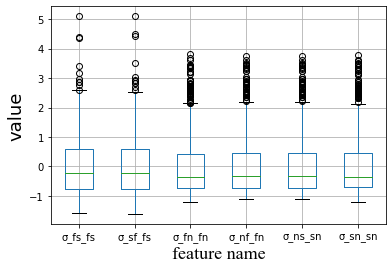

In [16]:
df[feature_columns].boxplot()
plt.gca().set_ylabel("value",fontdict={"size":18})
plt.gca().set_xlabel("feature name",fontdict={'family' : 'Times New Roman', 'size' : 18})
plt.xticks([1, 2, 3, 4, 5, 6], ['\u03C3_fs_fs', '\u03C3_sf_fs', '\u03C3_fn_fn','\u03C3_nf_fn','\u03C3_ns_sn','\u03C3_sn_sn'])
plt.show()

In [18]:
q_data,y_data=df.iloc[:,0:8],df.iloc[:,8:]


###################################
print(q_data,y_data)

            a         b        af        bf        as        bs       afs  \
0    3.928232  3.200536  8.641652  5.759627  6.208834  7.240240  7.753806   
1    8.691933  1.370216  9.460376  4.644240  2.322681  6.609739  1.274792   
2    2.317165  2.461860  4.961784  5.799351  8.632429  1.693629  4.251420   
3    8.754801  8.495461  8.554486  8.435463  7.772226  2.657984  7.569056   
4    5.393346  3.475825  3.269004  2.832693  5.516556  8.404119  3.430183   
..        ...       ...       ...       ...       ...       ...       ...   
994  1.332660  8.031332  9.427582  7.035074  5.253671  7.371068  6.873547   
995  1.433552  1.132593  7.262069  2.691987  5.762371  3.382114  5.462577   
996  8.658746  2.896802  3.090947  4.049025  3.445527  2.730431  8.554223   
997  7.872695  8.117512  8.539085  5.064507  3.678059  5.352707  2.448654   
998  7.307427  5.485536  5.593293  5.097481  2.374138  1.319408  1.215398   

          bfs  
0    9.289736  
1    9.359500  
2    1.862879  
3    1.8008

In [20]:
train_size=int(0.9*len(q_data))

In [22]:
q_data_train,q_data_test=q_data.iloc[:train_size,:],q_data.iloc[train_size:,:]
y_data_train,y_data_test=y_data.iloc[:train_size,:],y_data.iloc[train_size:,:]

In [24]:
q_data_exp,y_data_exp=q_data.iloc[-1,:].values.reshape((1,-1)),y_data.iloc[-1,:].values.reshape((1,-1))
print(y_data_exp)

[[-0.65462974 -0.73810072  0.07453812  0.07822404  0.07822404 -0.03596209]]


In [26]:
q_data_train.shape,q_data_test.shape,q_data_exp.shape,y_data_exp.shape

((899, 8), (100, 8), (1, 8), (1, 6))

In [28]:
q_data_exp

array([[7.3074267 , 5.48553551, 5.59329271, 5.09748081, 2.37413771,
        1.31940831, 1.21539836, 4.25124562]])

In [30]:
class SklearnHelper(object):
    def __init__(self, clf, params=None,isMuilt_reg=False):
        if isMuilt_reg: self.clf= MultiOutputRegressor (clf(**params))
        else: self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def score(self,x,y):
        return self.clf.score(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [32]:
def mse_loss(y_true,y_pred):
    return np.mean(np.square(y_true-y_pred))

X = q_data_train.values
y = y_data_train.values
X_test = q_data_test.values
y_test=y_data_test.values

In [34]:
X.shape,y.shape,X_test.shape,y_test.shape

((899, 8), (899, 6), (100, 8), (100, 6))

In [36]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, Matern,RationalQuadratic

In [45]:
start = timeit.default_timer()
## not yet finished
#kernel = ConstantKernel(100, (1e-3, 1e3))*Matern(length_scale= 100, length_scale_bounds=(0.0,1e4),nu=2.5)
kernel = ConstantKernel(100, (1e-3, 1e3))*RBF(length_scale= 1.0, length_scale_bounds=(0.0,100))
#kernel = RBF(length_scale= 1.0, length_scale_bounds=(0.0,100))

gpr_models=[]
for feat_flag in range(6):
    gpr_sub = GaussianProcessRegressor(kernel=kernel,
                    random_state=0)
    print('fitting feature %d' % feat_flag)
    gpr_sub.fit(X, y[:, feat_flag])
    print(gpr_sub.kernel_)
    gpr_models.append(gpr_sub)
stop = timeit.default_timer()

print('Time: ', stop - start)

fitting feature 0
30.8**2 * RBF(length_scale=24.3)
fitting feature 1
30.9**2 * RBF(length_scale=24.3)
fitting feature 2
31.3**2 * RBF(length_scale=24.4)
fitting feature 3
31.4**2 * RBF(length_scale=24.4)
fitting feature 4
31.4**2 * RBF(length_scale=24.4)
fitting feature 5
31.4**2 * RBF(length_scale=24.4)
Time:  137.34382110000024


In [40]:
# predicting the output and others using the selected hyperparameters
for feat_flag in range(6):
    print('fitting feature %d' % feat_flag)
    gpr_sub = gpr_models[feat_flag]
    pred = gpr_sub.predict(X_test)
    print('gpr Test: mse loss={:.6f} r2_score={:.6f}'.format(
        mse_loss(y_test[:, feat_flag], pred),metrics.r2_score(y_test[:, feat_flag], pred)))

fitting feature 0
gpr Test: mse loss=0.000366 r2_score=0.999637
fitting feature 1
gpr Test: mse loss=0.000359 r2_score=0.999641
fitting feature 2
gpr Test: mse loss=0.000239 r2_score=0.999726
fitting feature 3
gpr Test: mse loss=0.000234 r2_score=0.999733
fitting feature 4
gpr Test: mse loss=0.000234 r2_score=0.999733
fitting feature 5
gpr Test: mse loss=0.000228 r2_score=0.999737


In [42]:
y_pred=np.zeros(y_test.shape)
for ix, model in enumerate(gpr_models):
    y_pred[:, ix] += model.predict(X_test)

for feat_flag in range(6):
    loss_test = mse_loss(y_test[:, feat_flag], y_pred[:, feat_flag])
    R2_test  = metrics.r2_score(y_test[:, feat_flag], y_pred[:, feat_flag])
    print('Test: mse loss={:.6f} r2_score={:.6f}'.format(loss_test, R2_test))

Test: mse loss=0.000366 r2_score=0.999637
Test: mse loss=0.000359 r2_score=0.999641
Test: mse loss=0.000239 r2_score=0.999726
Test: mse loss=0.000234 r2_score=0.999733
Test: mse loss=0.000234 r2_score=0.999733
Test: mse loss=0.000228 r2_score=0.999737


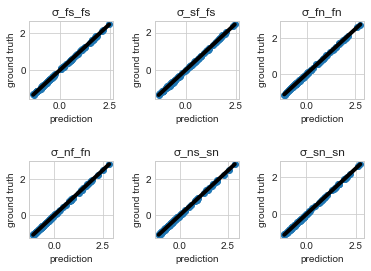

In [44]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.subplot(2,3,1)
feat_flag = 0;
feature_min = min(y_pred[:,feat_flag])
feature_max = max(y_pred[:,feat_flag])
feature_linspace = np.linspace(feature_min, feature_max, 100)
plt.plot(feature_linspace, feature_linspace, '-k', linewidth=4)
plt.scatter(y_pred[:,feat_flag], y_test[:,feat_flag], marker='o');
plt.xlabel('prediction')
plt.ylabel('ground truth');
plt.title('\u03C3_fs_fs')
#plt.show()

plt.subplot(2,3,2)
feat_flag = 1;
feature_min = min(y_pred[:,feat_flag])
feature_max = max(y_pred[:,feat_flag])
feature_linspace = np.linspace(feature_min, feature_max, 100)
plt.plot(feature_linspace, feature_linspace, '-k', linewidth=4)
plt.scatter(y_pred[:,feat_flag], y_test[:,feat_flag], marker='o');
plt.xlabel('prediction')
plt.ylabel('ground truth');
plt.title('\u03C3_sf_fs')
#plt.show()

plt.subplot(2,3,3)
feat_flag = 2;
feature_min = min(y_pred[:,feat_flag])
feature_max = max(y_pred[:,feat_flag])
feature_linspace = np.linspace(feature_min, feature_max, 100)
plt.plot(feature_linspace, feature_linspace, '-k', linewidth=4)
plt.scatter(y_pred[:,feat_flag], y_test[:,feat_flag], marker='o');
plt.xlabel('prediction')
plt.ylabel('ground truth');
plt.title('\u03C3_fn_fn')
#plt.show()

plt.subplot(2,3,4)
feat_flag = 3;
feature_min = min(y_pred[:,feat_flag])
feature_max = max(y_pred[:,feat_flag])
feature_linspace = np.linspace(feature_min, feature_max, 100)
plt.plot(feature_linspace, feature_linspace, '-k', linewidth=4)
plt.scatter(y_pred[:,feat_flag], y_test[:,feat_flag], marker='o');
plt.xlabel('prediction')
plt.ylabel('ground truth');
plt.title('\u03C3_nf_fn')
#plt.show()


plt.subplot(2,3,5)
feat_flag = 4;
feature_min = min(y_pred[:,feat_flag])
feature_max = max(y_pred[:,feat_flag])
feature_linspace = np.linspace(feature_min, feature_max, 100)
plt.plot(feature_linspace, feature_linspace, '-k', linewidth=4)
plt.scatter(y_pred[:,feat_flag], y_test[:,feat_flag], marker='o');
plt.xlabel('prediction')
plt.ylabel('ground truth');
plt.title('\u03C3_ns_sn')
#plt.show()

plt.subplot(2,3,6)
feat_flag = 5;
feature_min = min(y_pred[:,feat_flag])
feature_max = max(y_pred[:,feat_flag])
feature_linspace = np.linspace(feature_min, feature_max, 100)
plt.plot(feature_linspace, feature_linspace, '-k', linewidth=4)
plt.scatter(y_pred[:,feat_flag], y_test[:,feat_flag], marker='o');
plt.xlabel('prediction')
plt.ylabel('ground truth');
plt.title('\u03C3_sn_sn')
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace=0.8)
plt.show()

